In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
#from mlxtend.frequent_patterns import association_rules

In [3]:
groceries_df = pd.read_csv("D:\MS\Michigan\MSU\Fall 2023\Data Mining\Project\groceries - groceries.csv")

In [4]:
groceries_df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
groceries_df.shape

(9835, 33)

In [20]:
# Checking missing values

non_missing_per_transaction = groceries_df.iloc[:, 1:33].count(axis=1)
print(non_missing_per_transaction)

items_per_transaction = groceries_df["Item(s)"]
print(items_per_transaction)

indiv_transactions = (non_missing_per_transaction == items_per_transaction)
print(indiv_transactions)

num_rows_with_missing_values = (~is_complete_transaction).sum()
print(num_rows_with_missing_values)

0        4
1        3
2        1
3        4
4        4
        ..
9830    17
9831     1
9832    10
9833     4
9834     5
Length: 9835, dtype: int64
0        4
1        3
2        1
3        4
4        4
        ..
9830    17
9831     1
9832    10
9833     4
9834     5
Name: Item(s), Length: 9835, dtype: int64
0       True
1       True
2       True
3       True
4       True
        ... 
9830    True
9831    True
9832    True
9833    True
9834    True
Length: 9835, dtype: bool
0


In [22]:
print("Number of transactions with Missing Values (Mismatch in Number of Items):", num_rows_with_missing_values)

Number of transactions with Missing Values (Mismatch in Number of Items): 0


In [30]:
transaction_items = groceries_df.columns[1:33]

standalone_purchases = groceries_df[groceries_df["Item(s)"] == 1][transaction_items]

# Item Frequency Analysis for Standalone Purchases
standalone_items = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_items.head(5)
top_standalone_items

canned beer     260
soda            156
whole milk      121
bottled beer    120
rolls/buns      109
dtype: int64

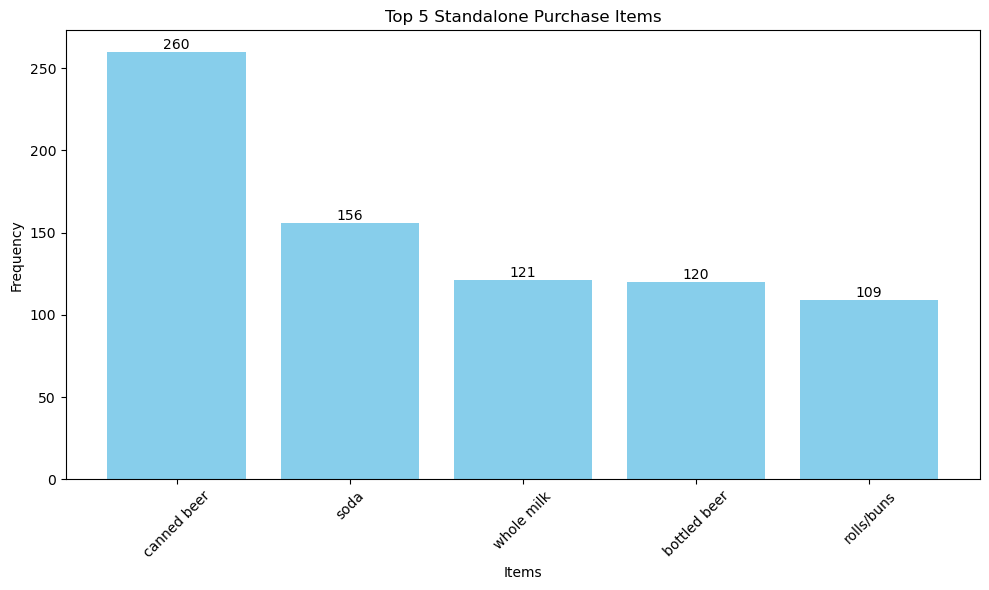

In [33]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_standalone_items.index, top_standalone_items.values, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 5 Standalone Purchase Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add values on top of each bar
for bar, value in zip(bars, top_standalone_items.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')
    
# Show the plot
plt.tight_layout()
plt.show()

In [36]:
oht = pd.get_dummies(groceries_df[transaction_items])

# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(oht, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
print(rules)

C:\Users\mounika\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                                           itemsets
0   0.030910                                      (Item 1_beef)
1   0.012303                                   (Item 1_berries)
2   0.018099                              (Item 1_bottled beer)
3   0.017285                             (Item 1_bottled water)
4   0.031520                               (Item 1_canned beer)
..       ...                                                ...
81  0.014032       (Item 2_whole milk, Item 1_other vegetables)
82  0.018302       (Item 3_whole milk, Item 2_other vegetables)
83  0.012506  (Item 2_root vegetables, Item 3_other vegetables)
84  0.017285       (Item 4_whole milk, Item 3_other vegetables)
85  0.010574       (Item 4_other vegetables, Item 5_whole milk)

[86 rows x 2 columns]

Association Rules:
                  antecedents                consequents  antecedent support  \
0     (Item 2_tropical fruit)      (Item 1_citrus fruit)            0.036096   
1       (I

In [38]:
# Analyzing the association rules
# Sorting the rules by metrics confidence, lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Printing the top 10 rules
top_N = 10
print("Top {} Association Rules:".format(top_N))
print(sorted_rules.head(top_N))

# Filtering rules based on confidence and lift
filtered_rules = sorted_rules[(sorted_rules['confidence'] >= 0.5) & (sorted_rules['lift'] >= 1.5)]
print("\nFiltered Association Rules:")
print(filtered_rules)

Top 10 Association Rules:
                  antecedents                consequents  antecedent support  \
3            (Item 2_sausage)       (Item 1_frankfurter)            0.010066   
13        (Item 5_whole milk)  (Item 4_other vegetables)            0.015150   
10        (Item 4_whole milk)  (Item 3_other vegetables)            0.032028   
11  (Item 3_other vegetables)        (Item 4_whole milk)            0.042196   
12  (Item 4_other vegetables)        (Item 5_whole milk)            0.025826   
6         (Item 3_whole milk)  (Item 2_other vegetables)            0.051449   
7   (Item 2_other vegetables)        (Item 3_whole milk)            0.055923   
8    (Item 2_root vegetables)  (Item 3_other vegetables)            0.038943   
0     (Item 2_tropical fruit)      (Item 1_citrus fruit)            0.036096   
5   (Item 1_other vegetables)        (Item 2_whole milk)            0.046772   

    consequent support   support  confidence       lift  leverage  conviction  \
3           